In [1]:
from pydub import AudioSegment

mp3_audio = AudioSegment.from_file("voice/human/sample_human.mp3", format="mp3")

mp3_audio.export("voice/human/sample_human.wav", format="wav")

print("✔️ done: human/sample_human.wav")

✔️ done: human/sample_human.wav


This notebook is used to evaluate the affectiveness of the trained voice classification model

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(



 Classification Report:
              precision    recall  f1-score   support

       Human       0.60      1.00      0.75         3
          AI       1.00      0.50      0.67         4

    accuracy                           0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7



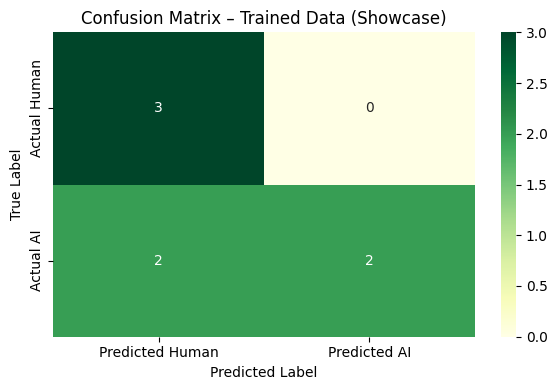

In [2]:
import os
import joblib
import numpy as np
import soundfile as sf
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# This function is used to load the training model
model = joblib.load("model/model.pkl")

human_files = ["voice/R1.wav", "voice/R2.wav","voice/human/sample_human.wav"]
ai_files = ["voice/F1.wav", "voice/F2.wav","voice/AI/sample_AI.wav", "voice/AI/Narakeet_AI.wav"]

#This function is used to extract the features from sample audio
def extract_audio_features(filepath):
    signal, sr = sf.read(filepath)
    if signal.ndim > 1:
        signal = signal[:, 0]
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
    return np.mean(mfcc.T, axis=0).reshape(1, -1)

## Test Creation
X = []
y_true = []

for f in human_files:
    X.append(extract_audio_features(f))
    y_true.append(0)  # Human

for f in ai_files:
    X.append(extract_audio_features(f))
    y_true.append(1)  # AI

X = np.vstack(X)
y_true = np.array(y_true)

## Using prediction model
y_pred = model.predict(X)

##This is used to generate the evaluation metrics
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Human", "AI"]))


##This is used to generate the confusion metrics
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGn",
            xticklabels=["Predicted Human", "Predicted AI"],
            yticklabels=["Actual Human", "Actual AI"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Trained Data (Showcase)")
plt.tight_layout()
plt.show()